In [1]:
# Assignment Page 89: 7-1
## Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations.
## How would you characterize the relationship between these variables?
import scipy.stats

In [2]:
from os.path import basename, exists
def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

In [3]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz")

In [4]:
import first
live, firsts, others = first.MakeFrames()
## If any NA values are present, drop that row or column for mother age and birth weight
live = live.dropna(subset=['agepreg', 'totalwgt_lb'])

In [5]:
live.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


In [6]:
## Load the libraries 
import numpy as np
import thinkstats2
import thinkplot
import pandas as pd
from scipy.stats import spearmanr

In [7]:
# Assign the age and birthweight in a variable for ploting
ages = live.agepreg
weights = live.totalwgt_lb
## calculate the Pearson co-relation
np.corrcoef(ages, weights)

#print('Corr', Corr(ages, weights))
#print('SpearmanCorr', SpearmanCorr(ages, weights))

array([[1.        , 0.06883397],
       [0.06883397, 1.        ]])

In [8]:
## calculate the spearman co-relation
live['agepreg'].corr(live['totalwgt_lb'], method='spearman')

0.09461004109658226

In [9]:
## Ans--> Pearson's co-relation is 0.06883397,where  Spearman's is around 0.09461.The difference between them suggests some influence
#    of outliers or a non-linear relationsip.

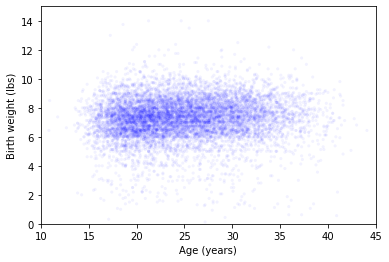

In [10]:
# scatterplot fro age and weight
thinkplot.Scatter(ages, weights, alpha=0.05, s=10)
thinkplot.Config(xlabel='Age (years)',
                     ylabel='Birth weight (lbs)',
                     xlim=[10, 45],
                     ylim=[0, 15],
                     legend=False)

In [11]:
## The scatterplot shows a weak relationship between the variables but it is hard to see clearly.

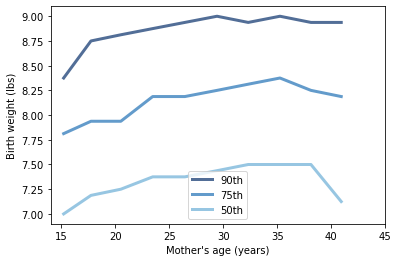

In [12]:
## Percentile calculation function
def BinnedPercentiles(df):
    bins = np.arange(10, 48, 3) # array creation routines for 10 to 48 with 3 diff
    indices = np.digitize(df.agepreg, bins) # Get the indices of the bins to which the each value is belongs to the above array 
    groups = df.groupby(indices) ## Group the data

    ages = [group.agepreg.mean() for i, group in groups][1:-1]
    ## calculate the CDF respect to the group.
    cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups][1:-1]

    thinkplot.PrePlot(3) 
    for percent in [90, 75, 50]: ## Calculate the percentile for 90,75,50
        weights = [cdf.Percentile(percent) for cdf in cdfs]
        label = '%dth' % percent
        thinkplot.Plot(ages, weights, label=label)

    thinkplot.Config(xlabel="Mother's age (years)",
                     ylabel='Birth weight (lbs)',
                     xlim=[14, 45], legend=True)  # plot the Age range from 14 to 45
BinnedPercentiles(live)   

In [13]:
#  Plotting percentiles of weight versus age suggests that the relationship is non-linear.  Birth weight increases more quickly
#    in the range of mother's age from 15 to 25.  After that, the effect is weaker. Around 40 its goes down.

In [14]:
# Assignment Page 89: 7-1
## In this chapter we used  𝑥¯and median to estimate µ, and found that  𝑥¯yields lower MSE. Also, we used  𝑆2 and  𝑆2𝑛−1
##  to estimate σ, and found that  𝑆2is biased and  𝑆2𝑛−1 unbiased. Run similar experiments to see if  𝑥¯ and median are biased estimates of µ. Also check whether  𝑆2
##  or  𝑆2𝑛−1 yields a lower MSE.

In [15]:
import random

In [16]:
# define function to Computes the mean error of a sequence of estimates which will return mean error
def MeanError(estimates, actual): # estimate: sequence of numbers  & ctual: actual value
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)

# Calculate Mean error for xbar and median as estimators of population mean.
def Estimate4(n=7, iters=10000000): # n: sample size ,   iters: number of iterations
    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)] ## use random.gauss for random floating point number with gaussian distribution.
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('Experiment 1')
    print('mean error xbar', MeanError(means, mu)) ## get mean error for Mean
    print('mean error median', MeanError(medians, mu)) ## get mean error for medians
    
Estimate4(7,1000000)

Experiment 1
mean error xbar -9.595846620773362e-05
mean error median 0.00025741223625631046


In [17]:
Estimate4(7,1000)

Experiment 1
mean error xbar 0.006271642619405266
mean error median -0.010378853679645786


In [ ]:
# xbar and median yield lower mean error as number of iterations increases, so We can not say one is obviously biased.

In [29]:
# Calculate RMSE for biased and unbiased estimators of population variance.
def Estimate5(n=7, iters=100000):
    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('Experiment 2')
    print('RMSE biased', RMSE(estimates1, sigma**2))
    print('RMSE unbiased', RMSE(estimates2, sigma**2))

Estimate5()

Experiment 2
RMSE biased 0.5138629463946345
RMSE unbiased 0.5755887457910279


In [31]:
Estimate5(7,100)

Experiment 2
RMSE biased 0.5157601733200191
RMSE unbiased 0.5649183107368089


In [ ]:
# The biased estimator of variance yields lower RMSE than the unbiased
# estimator, by about 10%.  And the difference holds up as number of iterations increases

In [ ]:
# Assignment Page 99: 8-2 
## Suppose you draw a sample with size n=10 from an exponential distribution with λ=2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.
## Repeat the experiment with a few different values of n and make a plot of standard error versus n.

In [23]:
# Function to calculate Root mean squared error
def RMSE(estimates, actual):
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

standard error 0.7787905826525228
confidence interval (1.2723100425780216, 3.7380079052740154)


0.7787905826525228

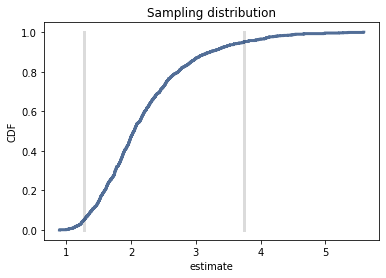

In [24]:
# Calculate Sampling distribution of L as an estimator of exponential parameter
def SimulateSample(lam=2, n=10, iters=1000):
##  lam: parameter of an exponential distribution, n: sample size ,iters: number of iterations
    def VertLine(x, y=1):
        thinkplot.Plot([x, x], [0, y], color='0.8', linewidth=3)

    estimates = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        lamhat = 1.0 / np.mean(xs)
        estimates.append(lamhat)

    stderr = RMSE(estimates, lam)
    print('standard error', stderr)

    cdf = thinkstats2.Cdf(estimates)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    print('confidence interval', ci)
    VertLine(ci[0])
    VertLine(ci[1])

    # plot the CDF
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel='estimate',
                     ylabel='CDF',
                     title='Sampling distribution')

    return stderr

SimulateSample()

standard error 0.19954823111342054
confidence interval (1.699293208168589, 2.3614788083257525)


0.19954823111342054

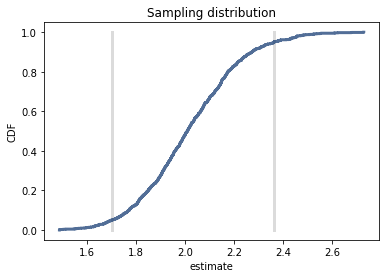

In [27]:
SimulateSample(2,100)

standard error 0.06257231535514308
confidence interval (1.8969126426211778, 2.100355408414471)


0.06257231535514308

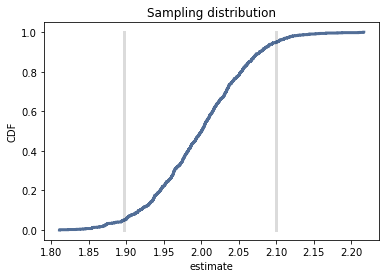

In [28]:
SimulateSample(2,1000)

In [ ]:
# 1) With sample size 10:

# standard error 0.7787905826525228
# confidence interval (1.699293208168589, 2.3614788083257525)

# 2) As sample size increases, standard error and the width of
#    the confidence intervals decrease:

# 10      0.80    (1.3, 3.9)
# 100     0.19    (1.7, 2.4)
# 1000    0.06    (1.9, 2.1)

# All three confidence intervals contain the actual value, 2.